# mlr3包
mlr3包和其扩展包为R语言提供了一个统一的、面向对象的、可扩展的机器学习框架，可用于回归、分类、生存分析和其他机器学习任务。mlr3并没有引入新的机器学习算法，而是为R中的机器学习R包通过了统一的接口，通过这个统一的接口，用户可以创建任务、选择合适的参数、进行大规模的模型比较等。原生支持多个步骤的并行化操作。

我们希望mlr3使用者具有基本的R语言和机器学习知识，本教程的后面一些内容将会介绍更高级的知识。mlr3既适合复杂的大型任务，也可以用于简单的任务。

mlr3既适合相关从业人员快速进行机器学习算法，也适合于研究人员在统一的环境中实施、测试、比较新的算法。mlr3包是mlr包的重写，吸收了最先进的经验，易于使用和扩展。

mlr3包及其生态系统专注于处理和转换数据、应用机器学习模型、计算结果，不提供图形化界面，数据和结果的可视化通过其他R包实现

## 使用data.table

- 获得更快、更方便的数据操作。
- 统一容器和结果类，以data.table格式返回结果
   这一特性简化了API，允许用户轻松选择和使用split-apply-combine操作，将R6和data.table结合。

## mlr3生态
- R6:参考类对象。（不是太懂，可类比R中的S3，S4对象，但是刚用起来感觉语法很奇怪）
- data.table：更快的速度！（明显感觉比tidymodels快很多）
- digest：hash digests
- uuid：唯一的字符标识
- lgr：日志控制
- mlbench：常用机器学习数据集

以上所有R包都是很成熟的，都是经过精心挑选的，不存在依赖性问题。对于更好的功能实现我们建议暗转以下R包：


In [4]:
data("mtcars", package = "datasets")
data <- mtcars[, 1:3]
str(data)


'data.frame':	32 obs. of  3 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...


In [5]:
data


,mpg,cyl,disp
,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0
Mazda RX4 Wag,21.0,6,160.0
Datsun 710,22.8,4,108.0
Hornet 4 Drive,21.4,6,258.0
Hornet Sportabout,18.7,8,360.0
Valiant,18.1,6,225.0
Duster 360,14.3,8,360.0
Merc 240D,24.4,4,146.7
Merc 230,22.8,4,140.8


In [6]:
library(mlr3)


In [7]:
task_mtcars <- as_task_regr(data,
    target = "mpg",
    id = "cars"
) # id是x随便起一个名字


In [15]:
str(task_mtcars)


Classes 'TaskRegr', 'TaskSupervised', 'Task', 'R6' <TaskRegr:cars> 


In [20]:
task_mtcars


<TaskRegr:cars> (32 x 3)
* Target: mpg
* Properties: -
* Features (2):
  - dbl (2): cyl, disp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



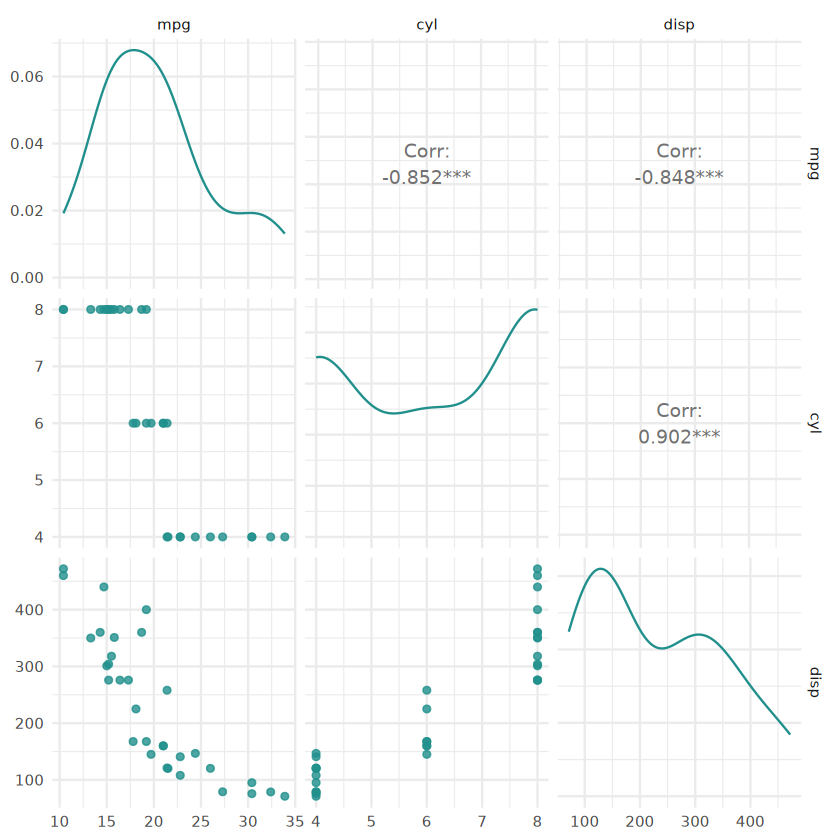

In [21]:
library("mlr3viz") # 使用此包可视化数据
mlr3viz::autoplot(task_mtcars, type = "pairs") # 基于GGally，我之前介绍过
## Registered S3 method overwritten by 'GGally':
##   method from
##   +.gg   ggplot2


## 查看内置数据集

In [12]:
as.data.table(mlr_tasks)


key,label,task_type,nrow,ncol,properties,lgl,int,dbl,chr,fct,ord,pxc
<chr>,<chr>,<chr>,<int>,<int>,<list>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
boston_housing,Boston Housing Prices,regr,506,18,,0,3,12,0,2,0,0
breast_cancer,Wisconsin Breast Cancer,classif,683,10,twoclass,0,0,0,0,0,9,0
german_credit,German Credit,classif,1000,21,twoclass,0,3,0,0,14,3,0
iris,Iris Flowers,classif,150,5,multiclass,0,0,4,0,0,0,0
mtcars,Motor Trends,regr,32,11,,0,0,10,0,0,0,0
penguins,Palmer Penguins,classif,344,8,multiclass,0,3,2,0,2,0,0
pima,Pima Indian Diabetes,classif,768,9,twoclass,0,0,8,0,0,0,0
sonar,Sonar: Mines vs. Rocks,classif,208,61,twoclass,0,0,60,0,0,0,0
spam,HP Spam Detection,classif,4601,58,twoclass,0,0,57,0,0,0,0


可以非常方便的取子集查看：

In [22]:
tsk


function (.key, ...) 
{
    dictionary_sugar_get(mlr_tasks, .key, ...)
}
<bytecode: 0x5596fd42d1e8>
<environment: namespace:mlr3>

In [28]:
task_penguin <- tsk("penguins")
print(task_penguin)
task_penguin$data()


<TaskClassif:penguins> (344 x 8): Palmer Penguins
* Target: species
* Properties: multiclass
* Features (7):
  - int (3): body_mass, flipper_length, year
  - dbl (2): bill_depth, bill_length
  - fct (2): island, sex


species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,NA,NA,NA,NA,Torgersen,NA,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007
Adelie,17.8,38.9,3625,181,Torgersen,female,2007
Adelie,19.6,39.2,4675,195,Torgersen,male,2007
Adelie,18.1,34.1,3475,193,Torgersen,NA,2007


In [29]:
task <- mlr_tasks$get("penguins") # same as tsk("penguins")
head(task$data())


species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,NA,NA,NA,NA,Torgersen,NA,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007


In [30]:
# library("mlr3verse")
as.data.table(mlr_tasks)[, 1:4]


key,label,task_type,nrow
<chr>,<chr>,<chr>,<int>
boston_housing,Boston Housing Prices,regr,506
breast_cancer,Wisconsin Breast Cancer,classif,683
german_credit,German Credit,classif,1000
iris,Iris Flowers,classif,150
mtcars,Motor Trends,regr,32
penguins,Palmer Penguins,classif,344
pima,Pima Indian Diabetes,classif,768
sonar,Sonar: Mines vs. Rocks,classif,208
spam,HP Spam Detection,classif,4601


支持非常多探索数据的操作：

In [31]:
task_penguin$ncol


[1] 8

In [32]:
task_penguin$nrow


[1] 344

In [34]:
task_penguin$feature_names


[1] "bill_depth"     "bill_length"    "body_mass"      "flipper_length"
[5] "island"         "sex"            "year"

In [35]:
task_penguin$feature_types


id,type
<chr>,<chr>
bill_depth,numeric
bill_length,numeric
body_mass,integer
flipper_length,integer
island,factor
sex,factor
year,integer


In [36]:
task_penguin$target_names


[1] "species"

In [37]:
task_penguin$task_type


[1] "classif"

In [38]:
task_penguin$data()


species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007
Adelie,NA,NA,NA,NA,Torgersen,NA,2007
Adelie,19.3,36.7,3450,193,Torgersen,female,2007
Adelie,20.6,39.3,3650,190,Torgersen,male,2007
Adelie,17.8,38.9,3625,181,Torgersen,female,2007
Adelie,19.6,39.2,4675,195,Torgersen,male,2007
Adelie,18.1,34.1,3475,193,Torgersen,NA,2007


In [39]:
task_penguin$head(3)


species,bill_depth,bill_length,body_mass,flipper_length,island,sex,year
<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>
Adelie,18.7,39.1,3750,181,Torgersen,male,2007
Adelie,17.4,39.5,3800,186,Torgersen,female,2007
Adelie,18.0,40.3,3250,195,Torgersen,female,2007


## 可视化数据：很多都是基于GGally包，可以看我之前的介绍


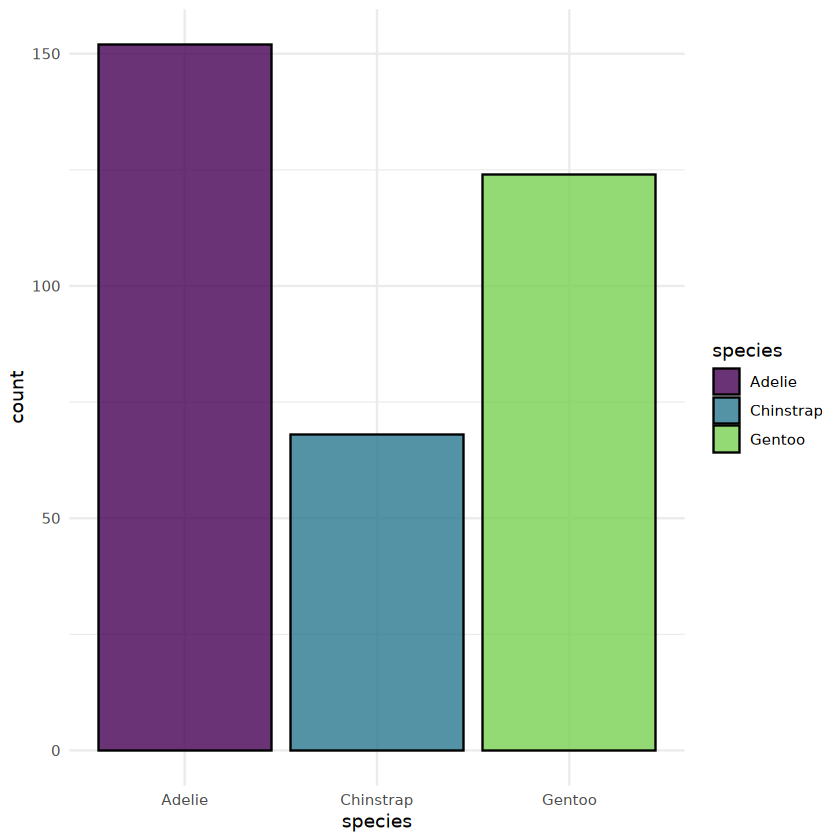

In [40]:
autoplot(task_penguin)


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows con

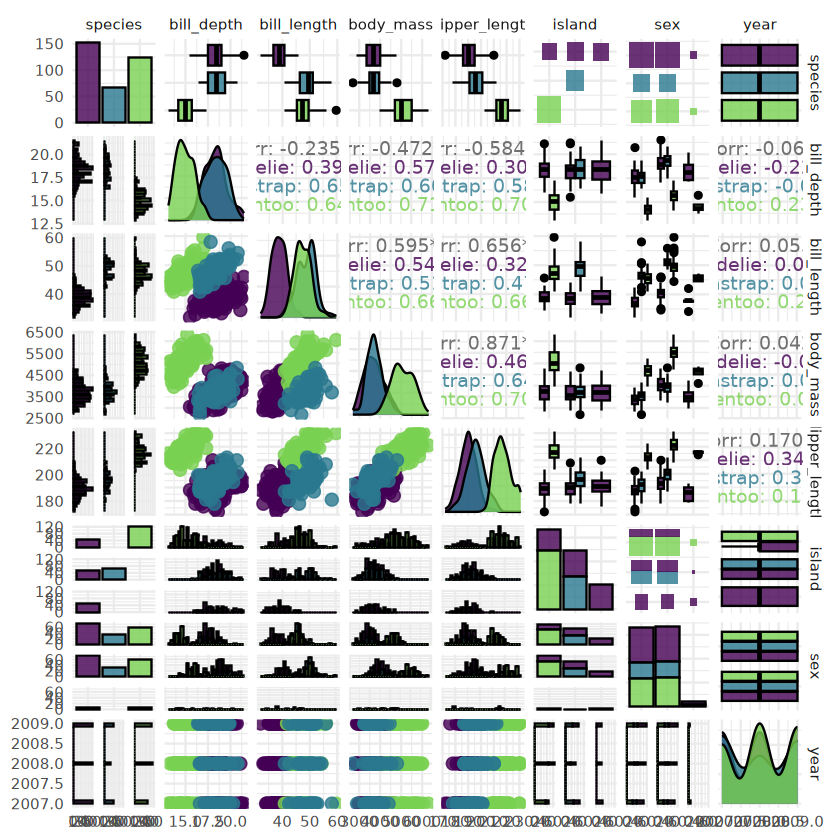

In [41]:
autoplot(task_penguin, type = "pairs")


## 创建learner
所有的学习器都通过以下2个步骤工作：

<image src="./images/640.webp">

`mlr3verse`只支持常见的学习器，比如随机森林、决策树、SVM、KNN等，如果想要查看所有的学习器，可以安装`mlr3extralearners`。

查看所有的支持的`learner:All learners`

In [43]:
library("mlr3verse")
mlr_learners


<DictionaryLearner> with 49 stored values
Keys: classif.cv_glmnet, classif.debug, classif.featureless,
  classif.glmnet, classif.kknn, classif.lda, classif.log_reg,
  classif.multinom, classif.naive_bayes, classif.nnet, classif.qda,
  classif.ranger, classif.rpart, classif.svm, classif.xgboost,
  clust.agnes, clust.ap, clust.cmeans, clust.cobweb, clust.dbscan,
  clust.dbscan_fpc, clust.diana, clust.em, clust.fanny,
  clust.featureless, clust.ff, clust.hclust, clust.hdbscan,
  clust.kkmeans, clust.kmeans, clust.MBatchKMeans, clust.mclust,
  clust.meanshift, clust.optics, clust.pam, clust.SimpleKMeans,
  clust.xmeans, regr.cv_glmnet, regr.debug, regr.featureless,
  regr.glmnet, regr.kknn, regr.km, regr.lm, regr.nnet, regr.ranger,
  regr.rpart, regr.svm, regr.xgboost

创建learner

In [44]:
# 决策树
learner <- lrn("classif.rpart")
print(learner)


<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: -
* Parameters: xval=0
* Packages: mlr3, rpart
* Predict Types:  [response], prob
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights


查看支持的超参数

In [45]:
learner$param_set


<ParamSet(10)>
                id    class lower upper nlevels        default  value
            <char>   <char> <num> <num>   <num>         <list> <list>
 1:             cp ParamDbl     0     1     Inf           0.01       
 2:     keep_model ParamLgl    NA    NA       2          FALSE       
 3:     maxcompete ParamInt     0   Inf     Inf              4       
 4:       maxdepth ParamInt     1    30      30             30       
 5:   maxsurrogate ParamInt     0   Inf     Inf              5       
 6:      minbucket ParamInt     1   Inf     Inf <NoDefault[0]>       
 7:       minsplit ParamInt     1   Inf     Inf             20       
 8: surrogatestyle ParamInt     0     1       2              0       
 9:   usesurrogate ParamInt     0     2       3              2       
10:           xval ParamInt     0   Inf     Inf             10      0

一目了然，方便使用，记不住了可以看看，毕竟太多了，这一点比`tidymodels`贴心。

设定超参数的值

In [46]:
learner$param_set$values <- list(cp = 0.01, xval = 0)
learner


<LearnerClassifRpart:classif.rpart>: Classification Tree
* Model: -
* Parameters: cp=0.01, xval=0
* Packages: mlr3, rpart
* Predict Types:  [response], prob
* Feature Types: logical, integer, numeric, factor, ordered
* Properties: importance, missings, multiclass, selected_features,
  twoclass, weights

也可以在指定learner时设定

In [47]:
learner <- lrn("classif.rpart", xval = 0, cp = 0.001)
learner$param_set$values


$cp
[1] 0.001

$xval
[1] 0

## 训练、预测和性能评价
### 创建任务，选择模型

In [48]:
library("mlr3verse")

task <- tsk("penguins") # 使用内置数据集
learner <- lrn("classif.rpart") # 决策树分类


### 划分训练集和测试集

In [49]:
spilt <- partition(task,
    ratio = 0.6,
    stratify = T
) # 回归任务中，首先将目标变量切分为 bins。参见 Task$add_strata()。


In [50]:
spilt$train


[1]   1   3   4   6   7   9  10  11  12  14  16  17  18  21  22  25  26  27
 [19]  28  29  30  32  33  34  35  37  39  41  42  44  45  46  49  50  53  55
 [37]  58  60  61  62  63  64  65  66  67  68  70  71  72  75  78  80  82  87
 [55]  88  90  91  92  94  96  97  98  99 102 103 104 108 112 115 118 119 120
 [73] 121 122 123 124 125 126 128 129 130 131 136 137 138 140 141 144 146 147
 [91] 151 154 155 156 158 159 160 161 162 164 165 168 170 172 173 177 180 181
[109] 183 185 186 187 190 192 193 194 195 197 198 201 202 205 206 209 211 212
[127] 213 215 216 217 219 224 227 228 230 234 235 236 239 240 241 242 244 245
[145] 246 248 249 250 251 252 253 255 257 260 264 265 266 267 268 269 272 273
[163] 274 275 276 278 279 280 283 284 286 287 288 289 290 292 295 297 299 300
[181] 301 304 305 306 307 308 309 310 313 314 318 322 324 325 326 327 328 331
[199] 332 334 335 337 338 339 341 344

### 训练模型

In [51]:
learner$train(task, row_ids = spilt$train)
print(learner$model)


n= 206 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 206 115 Adelie (0.44174757 0.19902913 0.35922330)  
  2) bill_length< 42.35 87   1 Adelie (0.98850575 0.01149425 0.00000000) *
  3) bill_length>=42.35 119  45 Gentoo (0.04201681 0.33613445 0.62184874)  
    6) island=Dream,Torgersen 44   4 Chinstrap (0.09090909 0.90909091 0.00000000) *
    7) island=Biscoe 75   1 Gentoo (0.01333333 0.00000000 0.98666667) *


### 预测


In [52]:
prediction <- learner$predict(task, row_ids = spilt$test)
print(prediction)


<PredictionClassif> for 138 observations:
    row_ids     truth  response
          2    Adelie    Adelie
          5    Adelie    Adelie
          8    Adelie    Adelie
---                            
        340 Chinstrap Chinstrap
        342 Chinstrap Chinstrap
        343 Chinstrap Chinstrap


### 混淆矩阵


In [53]:
prediction$confusion


           truth
response    Adelie Chinstrap Gentoo
  Adelie        54         0      3
  Chinstrap      5        27      0
  Gentoo         2         0     47

### 可视化

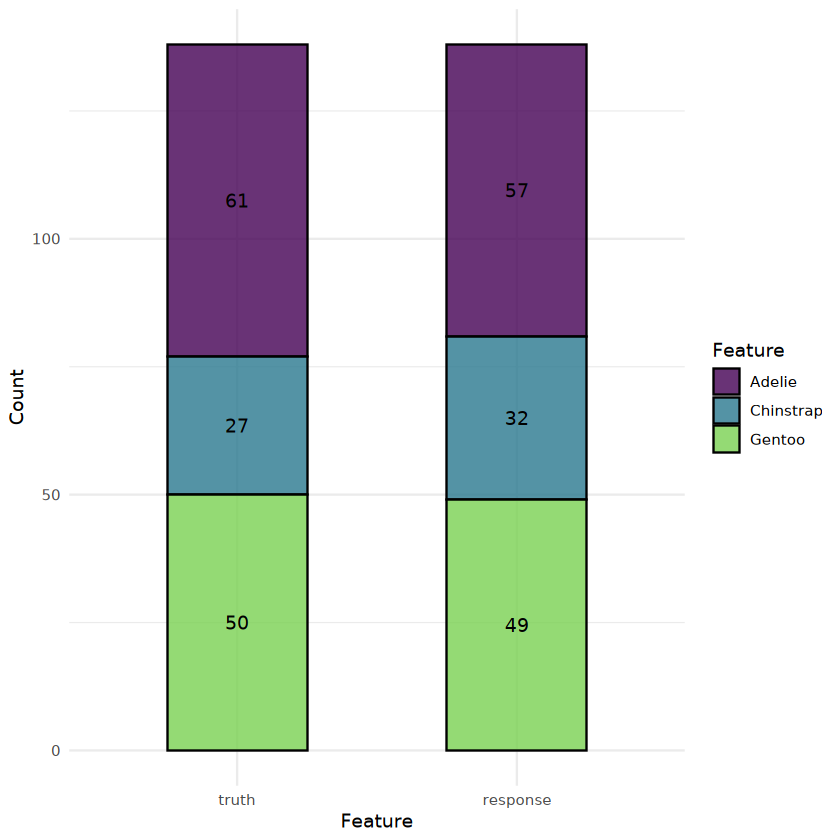

In [54]:
autoplot(prediction)


In [55]:
prediction


<PredictionClassif> for 138 observations:
    row_ids     truth  response
          2    Adelie    Adelie
          5    Adelie    Adelie
          8    Adelie    Adelie
---                            
        340 Chinstrap Chinstrap
        342 Chinstrap Chinstrap
        343 Chinstrap Chinstrap

In [65]:
prediction$row_ids


[1]   2   5   8  13  15  19  20  23  24  31  36  38  40  43  47  48  51  52
 [19]  54  56  57  59  69  73  74  76  77  79  81  83  84  85  86  89  93  95
 [37] 100 101 105 106 107 109 110 111 113 114 116 117 127 132 133 134 135 139
 [55] 142 143 145 148 149 150 152 153 157 163 166 167 169 171 174 175 176 178
 [73] 179 182 184 188 189 191 196 199 200 203 204 207 208 210 214 218 220 221
 [91] 222 223 225 226 229 231 232 233 237 238 243 247 254 256 258 259 261 262
[109] 263 270 271 277 281 282 285 291 293 294 296 298 302 303 311 312 315 316
[127] 317 319 320 321 323 329 330 333 336 340 342 343

### 模型评价

先查看下支持的评价指标

In [68]:
mlr_measures


<DictionaryMeasure> with 67 stored values
Keys: aic, bic, classif.acc, classif.auc, classif.bacc, classif.bbrier,
  classif.ce, classif.costs, classif.dor, classif.fbeta, classif.fdr,
  classif.fn, classif.fnr, classif.fomr, classif.fp, classif.fpr,
  classif.logloss, classif.mauc_au1p, classif.mauc_au1u,
  classif.mauc_aunp, classif.mauc_aunu, classif.mbrier, classif.mcc,
  classif.npv, classif.ppv, classif.prauc, classif.precision,
  classif.recall, classif.sensitivity, classif.specificity, classif.tn,
  classif.tnr, classif.tp, classif.tpr, clust.ch, clust.dunn,
  clust.silhouette, clust.wss, debug_classif, internal_valid_score,
  oob_error, regr.bias, regr.ktau, regr.mae, regr.mape, regr.maxae,
  regr.medae, regr.medse, regr.mse, regr.msle, regr.pbias, regr.rae,
  regr.rmse, regr.rmsle, regr.rrse, regr.rse, regr.rsq, regr.sae,
  regr.smape, regr.srho, regr.sse, selected_features, sim.jaccard,
  sim.phi, time_both, time_predict, time_train

In [67]:
mlr_measures$get("classif.acc")


<MeasureClassifSimple:classif.acc>: Classification Accuracy
* Packages: mlr3, mlr3measures
* Range: [0, 1]
* Minimize: FALSE
* Average: macro
* Parameters: list()
* Properties: -
* Predict type: response

In [69]:
as.data.table(mlr_measures)


key,label,task_type,packages,predict_type,task_properties
<chr>,<chr>,<chr>,<list>,<chr>,<list>
aic,Akaike Information Criterion,NA,mlr3,NA,
bic,Bayesian Information Criterion,NA,mlr3,NA,
classif.acc,Classification Accuracy,classif,"mlr3 , mlr3measures",response,
classif.auc,Area Under the ROC Curve,classif,"mlr3 , mlr3measures",prob,twoclass
classif.bacc,Balanced Accuracy,classif,"mlr3 , mlr3measures",response,
classif.bbrier,Binary Brier Score,classif,"mlr3 , mlr3measures",prob,twoclass
classif.ce,Classification Error,classif,"mlr3 , mlr3measures",response,
classif.costs,Cost-sensitive Classification,classif,mlr3,response,
classif.dor,Diagnostic Odds Ratio,classif,"mlr3 , mlr3measures",response,twoclass


### 这里我们选择accuracy

In [71]:
measure <- msr("classif.acc")
prediction$score(measure)


classif.acc 
  0.9275362

## 选择多个指标：

In [72]:
measures <- msrs(c("classif.acc", "classif.auc", "classif.ce"))
prediction$score(measures)


classif.acc classif.auc  classif.ce 
 0.92753623         NaN  0.07246377